# Practice: Wk. 9

In [1]:
# %load_ext rpy2.ipython
%reload_ext rpy2.ipython

-------------------

## [Week 9, Oct 28-Nov 3] Question 5.5

A glass bottle manufacturing company has recorded data on the average
number of defects per 10,000 bottles due to stones (small pieces of rock
embedded in the bottle wall) and the number of weeks since the last furnace
overhaul. The data are shown below.

...

- (a) Fit a straight-line regression model to the data and perform the standard
tests for model adequacy. 
- (b) Suggest an appropriate transformation to eliminate the problems encountered in part a. Fit the transformed model and check for adequacy.


$$
\sim \sim \sim 
$$

### (a)

In [10]:
%%R 

rm(list = ls())

R[write to console]: The following objects are masked from df (pos = 3):

    x, y


R[write to console]: The following objects are masked from df (pos = 4):

    x, y


R[write to console]: The following objects are masked from df (pos = 6):

    x, y


R[write to console]: The following objects are masked from df (pos = 7):

    x, y


R[write to console]: The following objects are masked from df (pos = 8):

    x, y





SUMMARY
---------

Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-24.70 -21.39  -6.96  23.56  43.77 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.7309     8.0170   4.457 0.000968 ***
x             0.4935     0.1634   3.021 0.011634 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.68 on 11 degrees of freedom
Multiple R-squared:  0.4535,	Adjusted R-squared:  0.4038 
F-statistic: 9.127 on 1 and 11 DF,  p-value: 0.01163


ANOVA
---------
Analysis of Variance Table

Response: y
          Df Sum Sq Mean Sq F value  Pr(>F)  
x          1 6017.5  6017.5  9.1268 0.01163 *
Residuals 11 7252.5   659.3                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] 659.3142


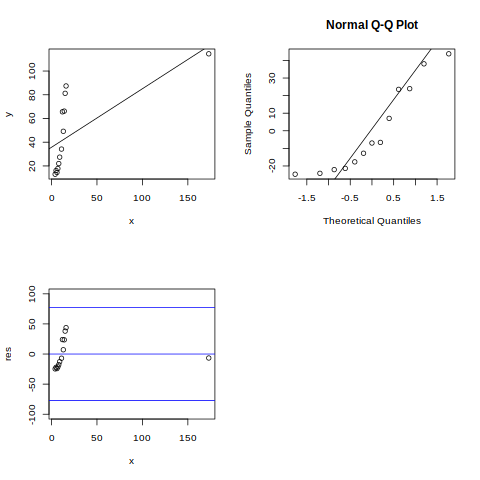

In [11]:
%%R 

rm(x, y)

# Load data
df=read.table(file="5-5.prn", header=TRUE)
attach(df)
# print(df)

# Linear model, F-statistic & summary
fit = lm(y~x)
writeLines("\nSUMMARY")
writeLines("---------")
print(summary(fit))
writeLines("\nANOVA")
writeLines("---------")
print(anova(fit))
# Note: Same H0 since single regressor

# Plots
par(mfrow=c(2,2))
plot(x, y) # Shows nonlinearity
abline(fit)
res=fit$residuals
qqnorm(res)
qqline(res)
plot(x, res, ylim=c(-100, 100))
abline(h=0,col="blue")
MSE = (summary(fit)$sigma)^2
print(MSE)
abline(h=3*sqrt(MSE), col="blue")
abline(h=-3*sqrt(MSE), col="blue")

The plots suggest nonlinearity, thus the model is not adequate.

### (b)

The graph shows an exponential trend, nonlinearity is confirmed by the residuals graph which shows a clear pattern. 

Since the graph is exponential, we use a log transformation.

R[write to console]: The following objects are masked from df (pos = 3):

    x, y


R[write to console]: The following objects are masked from df (pos = 4):

    x, y


R[write to console]: The following objects are masked from df (pos = 5):

    x, y


R[write to console]: The following objects are masked from df (pos = 6):

    x, y


R[write to console]: The following objects are masked from df (pos = 7):

    x, y


R[write to console]: The following objects are masked from df (pos = 8):

    x, y


R[write to console]: The following objects are masked from df (pos = 9):

    x, y


R[write to console]: The following objects are masked from df (pos = 11):

    x, y


R[write to console]: The following objects are masked from df (pos = 12):

    x, y


R[write to console]: The following objects are masked from df (pos = 13):

    x, y





SUMMARY
---------

Call:
lm(formula = ys ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8646 -0.5768 -0.1631  0.6749  0.9351 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.394218   0.210867  16.097 5.41e-09 ***
x           0.008827   0.004297   2.054   0.0645 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6754 on 11 degrees of freedom
Multiple R-squared:  0.2773,	Adjusted R-squared:  0.2116 
F-statistic:  4.22 on 1 and 11 DF,  p-value: 0.06449


ANOVA
---------
Analysis of Variance Table

Response: ys
          Df Sum Sq Mean Sq F value  Pr(>F)  
x          1 1.9250 1.92496  4.2202 0.06449 .
Residuals 11 5.0174 0.45613                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] 0.4561274


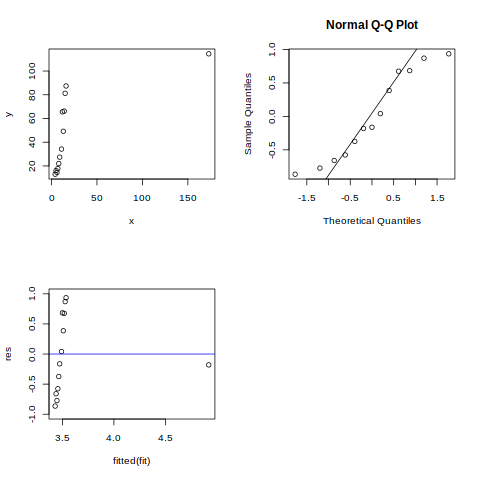

In [17]:
%%R 

rm(x, y)

# Load data
df=read.table(file="5-5.prn", header=TRUE)
attach(df)
# print(df)

# Linear model, F-statistic & summary
ys = log(y)
fit2 = lm(ys~x)
writeLines("\nSUMMARY")
writeLines("---------")
print(summary(fit2))
writeLines("\nANOVA")
writeLines("---------")
print(anova(fit2))
# Note: Same H0 since single regressor

# Plots
par(mfrow=c(2,2))
plot(x, y) # Shows linearity
abline(fit)
res=fit$residuals
qqnorm(res)
qqline(res)
plot(fitted(fit), res, ylim=c(-1, 1))
abline(h=0,col="blue")
MSE = (summary(fit)$sigma)^2
print(MSE)
abline(h=3*sqrt(MSE), col="blue")
abline(h=-3*sqrt(MSE), col="blue")

This model has higher R^2, better plots and retains adequacy. Thus the transformed data is adequate.

\+ REVIEW FOR PROCESS!!!

------------------------

## [Week 9, Oct 28-Nov 3] Question 5.15 [4th] or 5.17 [5th] 

Consider the model
$$
y = X\beta + \epsilon
$$

where $E(\epsilon) = 0$ and $V(\epsilon) = \sigma^2V$. Assume $V$ is known but not $\sigma^2$. Show that
$$
\frac{(y'V^{-1}y-y'V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1}y)}{n-p}
$$
is an unbiased estimate of $\sigma^2$.

Hint: use the following steps to prove the result:
- Define matrix $A = V^{-1} - V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1}$
- Show $AX=0$
- Show $X'A = 0$
- Show $y'Ay = \epsilon'A\epsilon$
- Show $E(\epsilon' A\epsilon) = (n-p)\sigma^2$

$$
\sim \sim \sim
$$

- Let $A = V^{-1} - V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1}$
  - Then 
    $$
    \begin{aligned}
    AX &= (V^{-1} - V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1})X \\
    &= V^{-1}X - V_{-1}X(X'V^{-1}X)^{-1}X'V^{-1}X \\
    &= V^{-1}X - V_{-1}X \\
    &= 0
    \end{aligned}
    $$
  - Also:
    $$
    \begin{aligned}
    X'A &= X'(V^{-1} - V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1}) \\
    &= X'V^{-1} - X'V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1} \\
    &= X'V^{-1} - X'V^{-1} \\
    &= 0
    \end{aligned}
    $$
  - Moreover:
    $$
    \begin{aligned}
    y'Ay &= (X\beta + \epsilon)'A(X\beta + \epsilon) \\
    &= (X\beta + \epsilon)'(V^{-1} - V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1})(X\beta + \epsilon) \\
    &= (X\beta + \epsilon)' (V^{-1}(X\beta + \epsilon) - (V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1})(X\beta + \epsilon)) \\
    &= (X\beta + \epsilon)'
    ((V^{-1}(X\beta) + V^{-1}\epsilon)
    - (V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1}X\beta \\
    &+ V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1} \epsilon)) \\
    &= (X\beta + \epsilon)'
    (V^{-1}(X\beta) + V^{-1}\epsilon
    - V^{-1}X \beta
    - V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1} \epsilon) \\
    &= (X\beta + \epsilon)'
    V^{-1}\epsilon - V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1} \epsilon \\
    &= ... \\
    &= \epsilon' A \epsilon
    \end{aligned}
    $$
  - Thus we have
    $$
    \begin{aligned}
    E(\epsilon' A\epsilon) &= tr(AV(\epsilon)) + E(\epsilon)'AE(\epsilon) \\
    &= tr(A\sigma^2 V) \\
    &= \sigma^2 tr(AV) \\
    &= \sigma^2 tr(V^{-1}V - V^{-1}X(X'V^{-1}X)^{-1}X'V^{-1}V) \\
    &= \sigma^2(tr(I_n - V^{-1} X(X'V^{-1}X)^{-1}X')) \\
    &= \sigma^2(n - tr(V^{-1} X(X'V^{-1}X)^{-1}X')) \\
    &= \sigma^2(n = tr((X'V^{-1}X)^{-1}X'V^{-1}X)) \\
    &= (n-p)\sigma^2 \\
    \end{aligned}
    $$

### \+ Notes

For any quadratic form iwth random vector $\epsilon$:
$$
E(\epsilon'A\epsilon) = tr(AV(\epsilon)) + \mu'A\mu
$$
Where:
- $V(\epsilon)$: Variance-covariance matrix of $\epsilon$
- $\mu$: Mean of epsilon $E(\epsilon)$

Thus we have the following key reduction:
$$
E(\epsilon' A \epsilon) = tr(A\sigma^2V) + 0'A0 = \sigma^2 tr(AV)
$$

There are two $I$'s involved in the derivation:
- $I_n = VV^{-1}$; $n$: Num observations thus $tr(I_n) = n$
- $I_p = (X'V^{-1}X)^{-1}(X'V^{-1}X)$: Num params thus $tr(I_p) = p$ ($X:n \times p$ and $V: n \times n$)

------------------------

## [Week 9, Oct 28-Nov 3] R codes

“Example 5.1 R script”, “Example 5.2 R script”
and “Example 5.5 R script” are posted on Brightspace. Read the relevant examples
in Chapter 5 of the textbook, and run these codes. Understand each and every line of the code, and understand the output.

$$
\sim \sim \sim
$$

R[write to console]: The following objects are masked from df (pos = 3):

    x, y


R[write to console]: The following objects are masked from df (pos = 4):

    x, y


R[write to console]: The following objects are masked from Data1 (pos = 6):

    Customer, x, y


R[write to console]: The following object is masked from Data1 (pos = 7):

    Customer




   Customer    x     y
1         1  679  0.79
2         2  292  0.44
3         3 1012  0.56
4         4  493  0.79
5         5  582  2.70
6         6 1156  3.64
7         7  997  4.73
8         8 2189  9.50
9         9 1097  5.34
10       10 2078  6.85
11       11 1818  5.84
12       12 1700  5.21
13       13  747  3.25
14       14 2030  4.43
15       15 1643  3.16
16       16  414  0.50
17       17  354  0.17
18       18 1276  1.88
19       19  745  0.77
20       20  435  1.39
21       21  540  0.56
22       22  874  1.56
23       23 1543  5.28
24       24 1029  0.64
25       25  710  4.00
26       26 1434  0.31
27       27  837  4.20
28       28 1748  4.88
29       29 1381  3.48
30       30 1428  7.58
31       31 1255  2.63
32       32 1777  4.99
33       33  370  0.59
34       34 2316  8.19
35       35 1130  4.79
36       36  463  0.51
37       37  770  1.74
38       38  724  4.10
39       39  808  3.94
40       40  790  0.96
41       41  783  3.29
42       42  406  0.44
43       43

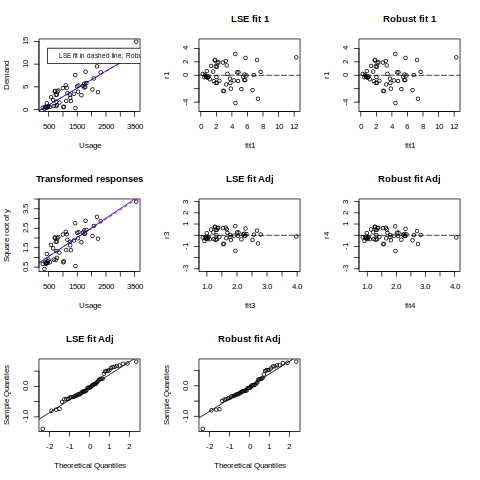

In [6]:
%%R
# Example 5.1: The electric utility data - power transformation
#
# This R code illustrates checking for linear model assumptions with residual plots
# and fitting model to transformed data. 

### [1] Input Data
#

rm(x, y)

Data1=read.table(file="Util.prn",header=TRUE)
attach(Data1)
print(Data1)

par(mfrow=c(3,3))
plot(x,y,xlab="Usage", ylab="Demand")


### [2] Fit a simple linear model in 2 ways, LSE fit and Robust fit, then examine
# residual plots for violations of model assumptions. 

# Robust fit discounts the impact of outliers. If plots for both fits show similar 
# departure from a uniform band, then the likely cause is a violation of the model
# assumption instead of presence of outliers.

library(robustbase)
l1=lm(y~x, data=Data1)
l2=lmrob(y~x, data=Data1)
abline(l1, col="red",lty=2)
abline(l2,col="blue")
legend(460,13.5, legend="LSE fit in dashed line; Robust fit in solid line",cex=0.8)

writeLines("\nLSE")
writeLines("-------------")
print(summary(l1))
writeLines("\nROBUST")
writeLines("-------------")
print(summary(l2))

r1=l1$residuals
fit1=l1$fitted.values
r2=l2$residuals
fit2=l2$fitted.values

# par(mfrow=c(2,1))
plot(fit1,r1,main="LSE fit 1", ylim=c(-5,5)) # variance increases with y-hat
abline(h=0, lty=5)
plot(fit1,r1,main="Robust fit 1", ylim=c(-5,5))  # variance increases with y-hat
abline(h=0, lty=5)


### [3] Fit a simple linear model in two ways to the transformed response
# The square root transformation is apporpriate (see notes and/or textbook)

ynew=sqrt(y)

# par(mfrow=c(1,1))
plot(x,ynew ,xlab="Usage", ylab="Square root of y", main="Transformed responses")

l3=lm(ynew~x)
l4=lmrob(ynew~x)
abline(l3, col="red",lty=2)
abline(l4, col="blue")
legend(460,13.5, legend="LSE fit in dashed line; Robust fit in solid line",cex=0.8)

print(summary(l3))
print(summary(l4))

r3=l3$residuals
fit3=l3$fitted.values
r4=l4$residuals
fit4=l4$fitted.values

# par(mfrow=c(2,1))
plot(fit3,r3,main="LSE fit Adj", ylim=c(-3,3)) # variance is now stabilized.
abline(h=0, lty=5)
plot(fit4,r4,main="Robust fit Adj", ylim=c(-3,3))  # variance stabilized.
abline(h=0, lty=5)

qqnorm(r3, main="LSE fit Adj") 
qqline(r3)  # normal assumption on the transformed data seems okay.

qqnorm(r4, main="Robust fit Adj") 
qqline(r4)  # normal assumption okay.
shapiro.test(r4)  # test H0: error in model 4 normally distributed. Do not
                  # reject the H0 as the p-value is about 10%.

### Interpreting output

## Model Comparison Analysis

**LSE vs Robust Fit Coefficients**
| Model  | Intercept | Slope    | R-squared |
|--------|-----------|----------|-----------|
| LSE    | -0.8313   | 0.00368  | 0.7046   |
| Robust | -0.8595   | 0.00374  | 0.7110   |

**Key Findings**

1. **Model Fit**
- Both models show similar R-squared values (~0.71)
- Both slopes are highly significant (p < 0.001)
- Intercepts are marginally significant (p ≈ 0.06)

2. **Residual Analysis**
- LSE residual SE: 1.577
- Robust residual SE: 1.425 (lower, indicating better fit)
- Residuals range approximately from -4 to +3 in both models

3. **Robustness Weights**
- 4 observations have weights ≈ 1 (fully trusted points)
- Remaining 49 observations have weights ranging from 0.3681 to 0.9987
- Median weight of 0.9434 suggests most observations are reliable

4. **Normality**
- Shapiro-Wilk test (p = 0.09843) suggests marginal normality
- Fail to reject normality at 5% significance level

5. **Transformed Model Performance**
- Transformed models show improved residual standard errors
- R-squared values remain similar but residual ranges are smaller
- Robust estimation still shows slight advantage over LSE

$$
\sim \sim \sim
$$

R[write to console]: The following objects are masked _by_ .GlobalEnv:

    x2, xinv


R[write to console]: The following objects are masked from data1 (pos = 3):

    Observation, x, x2, xinv, y


R[write to console]: The following objects are masked from data1 (pos = 4):

    Observation, x, x2, xinv, y


R[write to console]: The following objects are masked from data1 (pos = 5):

    Observation, x, x2, xinv, y


R[write to console]: The following objects are masked from data1 (pos = 6):

    x, x2, xinv, y




   Observation     x     y       x2       xinv
1            1  5.00 1.582  25.0000 0.20000000
2            2  6.00 1.822  36.0000 0.16666667
3            3  3.40 1.057  11.5600 0.29411765
4            4  2.70 0.500   7.2900 0.37037037
5            5 10.00 2.236 100.0000 0.10000000
6            6  9.70 2.386  94.0900 0.10309278
7            7  9.55 2.294  91.2025 0.10471204
8            8  3.05 0.558   9.3025 0.32786885
9            9  8.15 2.166  66.4225 0.12269939
10          10  6.20 1.866  38.4400 0.16129032
11          11  2.90 0.653   8.4100 0.34482759
12          12  6.35 1.930  40.3225 0.15748031
13          13  4.60 1.562  21.1600 0.21739130
14          14  5.80 1.737  33.6400 0.17241379
15          15  7.40 2.088  54.7600 0.13513514
16          16  3.60 1.137  12.9600 0.27777778
17          17  7.85 2.179  61.6225 0.12738854
18          18  8.80 2.112  77.4400 0.11363636
19          19  7.00 1.800  49.0000 0.14285714
20          20  5.45 1.501  29.7025 0.18348624
21          2

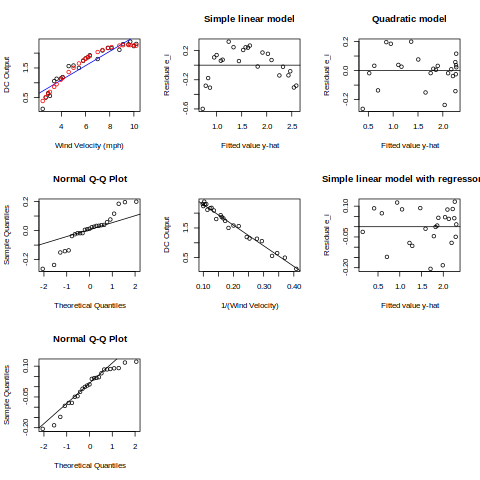

In [6]:
%%R 
# Example 5.2: The Windmill data - y (DC) is nonlinear in x (Wind) 
#
# This R code illustrates checking for linear model assumptions with residual plots
# and fitting model to transformed data. 

### [1] Input Data
#

rm(x,y)
par(mfrow=c(3,3))

Data1=read.table(file="Windmill.prn",header=TRUE)
x2=Data1[,2]*Data1[,2] # Data[,2] is the x column; x2=x^2
xinv=1/Data1[,2]       # xinv=1/x
data1=cbind(Data1,x2,xinv)
attach(data1)
print(data1)

# # par(mfrow=c(1,1))
plot(x,y,xlab="Wind Velocity (mph)", ylab="DC Output")


### [2] Fit simple linear model and quadratic model
# Plot model residuals to check for model adequacy. 

l1=lm(y~x)
abline(l1, col="blue")
r1=l1$residuals
fitted1=y-r1

l2=lm(y~x+x2) 
r2=l2$residuals
fitted2=y-r2
points(x, fitted2, col="red")

# # par(mfrow=c(2,1))
plot(fitted1,r1 ,xlab="Fitted value y-hat", ylab="Residual e_i", main="Simple linear model")
abline(h=0)  # simple linear model residual plot suggests the model is not adequate

plot(fitted2,r2 ,xlab="Fitted value y-hat", ylab="Residual e_i", main="Quadratic model")
abline(h=0)  # quadratic model residual plot looks okay

print(summary(l2))

# # par(mfrow=c(1,1))

qqnorm(r2)    # check the normality of error using Q-Q plot
qqline(r2)
print(shapiro.test(r2)) # test H0 that the errors are normally distributed.

# although the test is not significant at 5%, the Q-Q plot suggests violation of the normal assumption.


### [3] Fit simple linear model with a transformed regressor variable
# Plot model residuals to check for model adequacy. 

# # par(mfrow=c(1,1))
plot(xinv,y,xlab="1/(Wind Velocity)", ylab="DC Output")

l3=lm(y~xinv)
abline(l3)     # nice linear relation between y and transformed x.
r3=l3$residuals
fitted3=y-r3

plot(fitted3,r3 ,xlab="Fitted value y-hat", ylab="Residual e_i", main="Simple linear model with regressor 1/x")
abline(h=0)  # simple linear model residual plot suggests the model is not adequate

qqnorm(r3)    # check the normality of error using Q-Q plot
qqline(r3)
print(shapiro.test(r3)) # test the H0 that the errors are normally distributed.

# the Q-Q plot looks somewhat better than that of the quadratic model.


### \+ Notes

For the Shapiro-Wilk normality test:

#### P-value Interpretation
- If p > 0.05: Fail to reject the null hypothesis that the data is normally distributed
- If p ≤ 0.05: Reject the null hypothesis, indicating the data is not normally distributed

#### Important Considerations
- A p-value > 0.05 does not prove normality, it only fails to disprove it
- Sample size affects interpretation:
  - Large samples can detect tiny deviations from normality
  - Small samples may fail to detect significant non-normality

$$
\sim \sim \sim
$$


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-19287.1  -4827.3   -638.3   7363.0  16351.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.944e+04  4.289e+03   11.53 3.81e-12 ***
x           8.048e+00  3.265e-01   24.65  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8999 on 28 degrees of freedom
Multiple R-squared:  0.9559,	Adjusted R-squared:  0.9544 
F-statistic: 607.5 on 1 and 28 DF,  p-value: < 2.2e-16


Call:
lm(formula = y ~ x, weights = w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-171.94  -55.46  -10.04   69.87  124.86 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.082e+04  2.721e+03   18.68   <2e-16 ***
x           7.935e+00  2.607e-01   30.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 80.19 on 28 degrees of freedom
Multiple R-

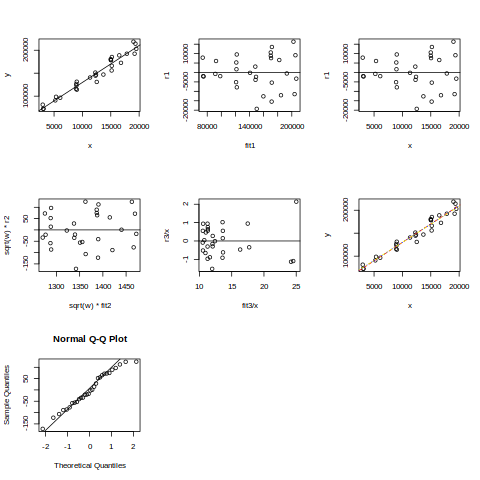

In [4]:
%%R
#Example 5.5 Restaurant Food Sales Data 
#
# This example compares the original and weighted LSE's.
# Note the difference in estimated parameter values and their s.e.'s. 
# The weighted estimates have smaller s.e.'s.
#  
#    y=Income
#    x=Advertising expense

rm(x, y)

x=c(3000,3150,3085,5225,5350,6090,8925,9015,8885,8950,9000,11345,12275,
12400,12525,12310,13700,15000,15175,14995,15050,15200,15150,16800,16500,
17830,19500,19200,19000,19350)

y=c(81464,72661,72344,90743,98588,96507,126574,114133,115814,123181,
131434,140564,151352,146926,130963,144630,147041,179021,166200,180732,
178187,185304,155931,172579,188851,192424,203112,192482,218715,214317)

par(mfrow=c(3,3))
plot(x,y)
l1=lm(y~x)     #LSE fit (unweighted)
abline(l1)
print(summary(l1))

r1=l1$residuals
fit1=y-r1

plot(fit1,r1) #shows the variance increases with fitted value
abline(h=0)
plot(x,r1)    #shows the variance increases with x
abline(h=0)

w=1/x         #define weights (see lecture notes or Expl 5.5 in the textbook)
l2=lm(y~x, weights=w)  #weighted least squares -- this model is good.
r2=l2$residuals
fit2=y-r2
plot(sqrt(w)*fit2,sqrt(w)*r2) # plot weighted residuals vs weighted fitted 
abline(h=0)                   # value; weighted variance not increasing
print(summary(l2))

l3=lm(y~x, weights=1/x^2) # weighted least squares with different weights
print(summary(l3))
r3=l3$residuals
fit3=y-r3
plot(fit3/x,r3/x)  # This plot does not look as uniform as the one for l2.
abline(h=0)        # So this model is not as good.

plot(x,y)          # compare the three fitted lines.
abline(l1, col="red", lty=2)
abline(l2, col="blue", lty=3)
abline(l3, col="yellow", lty=4)

# par(mfrow=c(1,1))

qqnorm(r2/sqrt(x))  # Q-Q plot of the weighted residual from fit2, looks fine.
qqline(r2/sqrt(x))
print(shapiro.test(r2/sqrt(x))) # Normality assumption fine; p-value very large.





### \+ Notes:

#### Weighted Least Squares Analysis

**Purpose**
Weighted least squares (WLS) assigns different weights to observations based on their reliability or variance structure. In this case, w=1/x means:
- Lower weights for larger x values
- Higher weights for smaller x values
- Compensates for heteroscedasticity in the original data

**Mathematical Framework**
The WLS method minimizes:
$$ \sum w_i(y_i - \hat{y}_i)^2 = \sum \frac{1}{x_i}(y_i - \hat{y}_i)^2 $$

**Transformation Effects**
- Multiplying residuals by √w transforms them to standardized form
- Plotting weighted residuals vs weighted fitted values helps assess if:
  - Variance has been stabilized
  - Model assumptions are better met
  - Heteroscedasticity has been addressed

**Benefits**
- More efficient parameter estimates when variance is not constant
- Better handling of observations with different precisions
- More reliable statistical inference
- Improved model diagnostics through weighted residual plots

The horizontal band in the weighted residual plot indicates successful variance stabilization compared to the original unweighted analysis.



------------------------